In [1]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Importing train data

In [2]:
df_train = pd.read_csv('C:\\Nikhil\\DS\\Assignments\\Support Vector Machine\\SalaryData_Train(1).csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
df_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [5]:
# Changing >50K to '1' and <=50K to '0' and all columns with the help of label encoder
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


<AxesSubplot:>

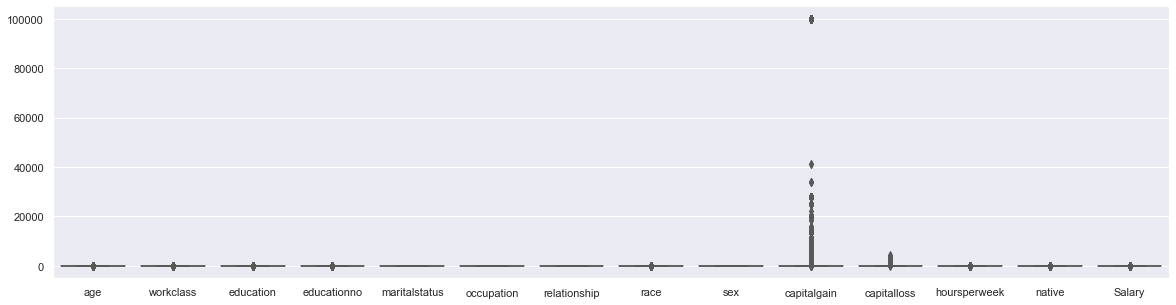

In [6]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df_train, orient="v", palette="Set2") 
#There are outliers in the case of capital gain. But we cannot discard it

# Importing test data

In [7]:
df_test = pd.read_csv('C:\\Nikhil\\DS\\Assignments\\Support Vector Machine\\SalaryData_Test(1).csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
# Changing >50K to '1' and <=50K to '0' and all columns with the help of label encoder
cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
df_test[cols] = df_test[cols].apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


<AxesSubplot:>

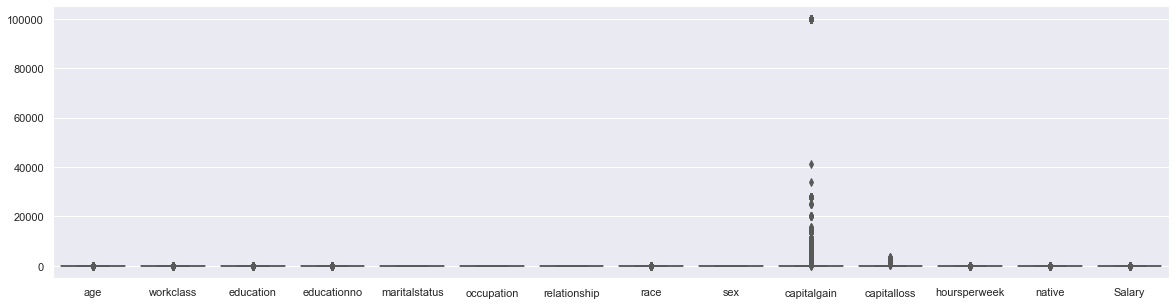

In [10]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df_test, orient="v", palette="Set2") 
# Here also outliers are there in the case of capital gain. But we cannot discard it also

In [11]:
x_train = df_train.iloc[:,:13]
y_train = df_train.iloc[:,13]
x_test = df_test.iloc[:,:13]
y_test = df_test.iloc[:,13]

In [12]:
# feature selection
def select_features(x_train, y_train, x_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(x_train, y_train)
    # transform train input data
    x_train_fs = fs.transform(x_train)
    # transform test input data
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

Feature 0: 0.055751
Feature 1: 0.008177
Feature 2: 0.017205
Feature 3: 0.060906
Feature 4: 0.110291
Feature 5: 0.035977
Feature 6: 0.061472
Feature 7: 0.000568
Feature 8: 0.022114
Feature 9: 0.051443
Feature 10: 0.015650
Feature 11: 0.030196
Feature 12: 0.005839


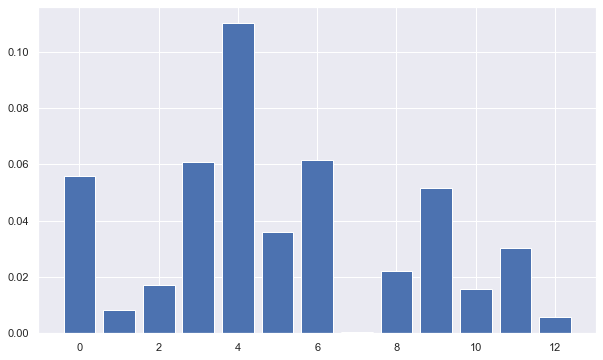

In [13]:
# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [14]:
df_train.drop(['workclass','education','race','native','capitalloss'], axis = 1, inplace = True)
df_test.drop(['workclass','education','race','native','capitalloss'], axis = 1, inplace = True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   educationno    30161 non-null  int64
 2   maritalstatus  30161 non-null  int32
 3   occupation     30161 non-null  int32
 4   relationship   30161 non-null  int32
 5   sex            30161 non-null  int32
 6   capitalgain    30161 non-null  int64
 7   hoursperweek   30161 non-null  int64
 8   Salary         30161 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 1.5 MB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            15060 non-null  int64
 1   educationno    15060 non-null  int64
 2   maritalstatus  15060 non-null  int32
 3   occupation     15060 non-null  int32
 4   relationship   15060 non-null  int32
 5   sex            15060 non-null  int32
 6   capitalgain    15060 non-null  int64
 7   hoursperweek   15060 non-null  int64
 8   Salary         15060 non-null  int32
dtypes: int32(5), int64(4)
memory usage: 764.9 KB


In [17]:
x_train = df_train.iloc[:,:8]
y_train = df_train.iloc[:,8]
x_test = df_test.iloc[:,:8]
y_test = df_test.iloc[:,8]

# Applying SVM classification

# Below codes are not running, can you explain me why it is happning ?

In [ ]:
# We are trying kernal as linear and checking the accuracy  
clf = SVC(kernel = 'linear')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
# We are trying kernal as rmf and checking the accuracy
clf = SVC(kernel = 'rmf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)